**Multiclass SVM for Wine Data**

In [2]:
!jupyter kernelspec list

Available kernels:
  python3    C:\Users\Balu\.conda\envs\tf\share\jupyter\kernels\python3


Accuracy: 97.22%


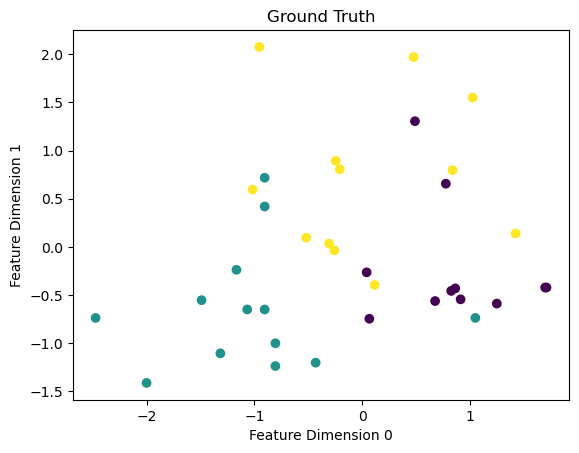

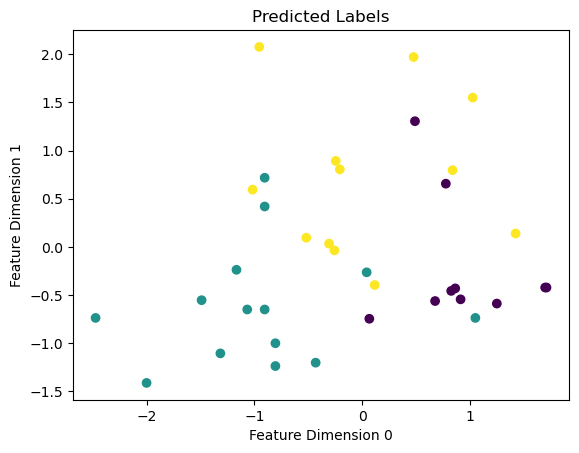

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

wine_data = np.load('wineData.npy')
wine_labels = np.load('wineLabels.npy')

X_trn, X_tst, y_trn, y_tst = train_test_split(wine_data, wine_labels, test_size=0.2)

normaliser = StandardScaler()
X_trn_std = normaliser.fit_transform(X_trn)
X_tst_std = normaliser.transform(X_tst)

model = SVC()
model.fit(X_trn_std, y_trn)

p_labels = model.predict(X_tst_std)

accuracy = model.score(X_tst_std, y_tst)
print(f"Accuracy: {accuracy:.2%}")


plt.scatter(X_tst_std[:, 0], X_tst_std[:, 1], c=y_tst, cmap='viridis', marker='o')
plt.title('Ground Truth')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.show()

plt.scatter(X_tst_std[:, 0], X_tst_std[:, 1], c=p_labels, cmap='viridis', marker='o')
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.show()



We then experiment with different hyperparameters, kernel = linear and cost = 1.0

In [4]:
wine_data = np.load('wineData.npy')
wine_labels = np.load('wineLabels.npy')

X_trn, X_tst, y_trn, y_tst = train_test_split(wine_data, wine_labels, test_size=0.2)

normaliser = StandardScaler()
X_train = normaliser.fit_transform(X_trn)
X_test = normaliser.transform(X_tst)

model = SVC(kernel = 'poly', C = 10)
model.fit(X_train, y_trn)

p_labels = model.predict(X_test)

accuracy = model.score(X_test, y_tst)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 91.67%


**Neural Network for Wine Data**

Epoch 1/100
4/4 [==============================] - 2s 211ms/step - loss: 1.6105 - sparse_categorical_accuracy: 0.3451 - val_loss: 1.1683 - val_sparse_categorical_accuracy: 0.3448
Epoch 2/100
4/4 [==============================] - 0s 30ms/step - loss: 1.5093 - sparse_categorical_accuracy: 0.3363 - val_loss: 1.1294 - val_sparse_categorical_accuracy: 0.3448
Epoch 3/100
4/4 [==============================] - 0s 28ms/step - loss: 1.4244 - sparse_categorical_accuracy: 0.3097 - val_loss: 1.0977 - val_sparse_categorical_accuracy: 0.2759
Epoch 4/100
4/4 [==============================] - 0s 28ms/step - loss: 1.3547 - sparse_categorical_accuracy: 0.3009 - val_loss: 1.0712 - val_sparse_categorical_accuracy: 0.2759
Epoch 5/100
4/4 [==============================] - 0s 27ms/step - loss: 1.2974 - sparse_categorical_accuracy: 0.3009 - val_loss: 1.0507 - val_sparse_categorical_accuracy: 0.3103
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 1.2523 - sparse_categorical_accuracy:

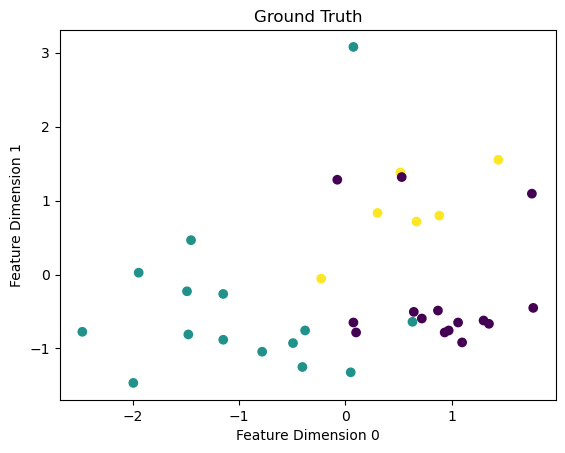

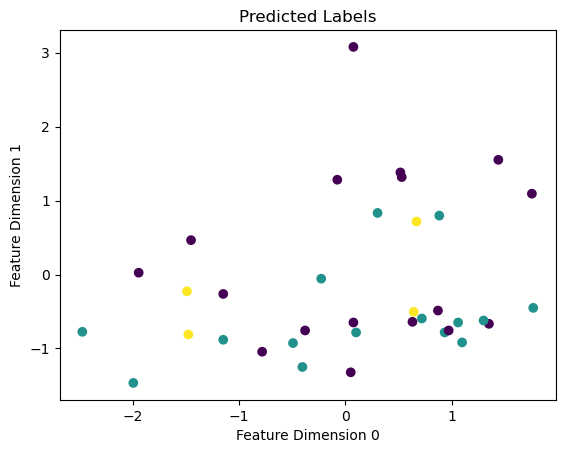

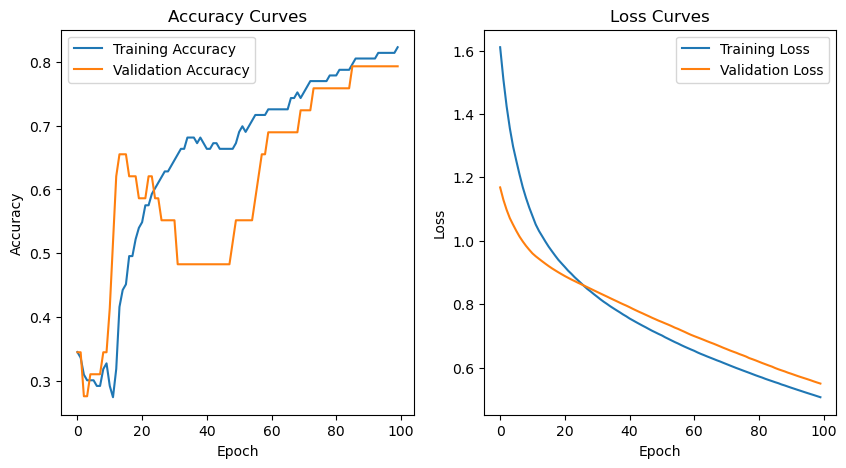

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import tensorflow as tf

wine_data = np.load('wineData.npy')
wine_labels = np.load('wineLabels.npy')

X_trn, X_tst, y_trn, y_tst = train_test_split(wine_data, wine_labels, test_size=0.2)

normaliser = StandardScaler()
X_trn_std = normaliser.fit_transform(X_trn)
X_tst_std = normaliser.transform(X_tst)

model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_trn)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(X_trn_std, y_trn, epochs=100, validation_split=0.2, verbose=1)

model.summary()

plt.scatter(X_tst_std[:, 0], X_tst_std[:, 1], c=y_tst, cmap='viridis', marker='o')
plt.title('Ground Truth')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.show()

plt.scatter(X_tst_std[:, 0], X_tst_std[:, 1], c=p_labels, cmap='viridis', marker='o')
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.show()

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

**Neural Network for Digit Recognition**

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10
Epoch 1/10
1500/1500 [==============================] - 1s 544us/step - loss: 1.6736 - sparse_categorical_accuracy: 0.4082 - val_loss: 1.1855 - val_sparse_categorical_accuracy: 0.6043
Epoch 2/10
1500/1500 [==============================] - 1s 486us/step - loss: 0.9409 - sparse_categorical_accuracy: 0.7023 - val_loss: 0.7182 - val_sparse_categorical_accuracy: 0.7929
Epoch 3/10
1500/1500 [==============================] - 1s 493us/step - loss: 0.6750 - sparse_categorical_accuracy: 0.8007 - val_loss: 0.5760 - val_sparse_categorical_accuracy: 0.8285
Epoch 4/10
1500/1500 [==============================] - 1s 500us/step - loss: 0.5567 - sparse_categorical_accuracy: 0.8406 - val_loss: 0.4910 - val_sparse_categorical_accuracy: 0.8574
Epoch 5/10
1500/1500 [==============================] - 1s 477us/step - loss: 0.5089 - sparse_categorical_accuracy: 0.8544 - val_loss: 0.4647 - va

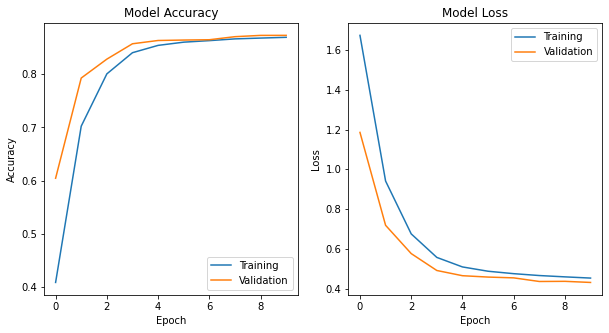

In [4]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f'MNIST sample shape: {x_train.shape[1:]}')
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(f'Number of classes: {len(np.unique(y_train))}')

train_data = np.reshape(x_train, (60000, 784)) / 255.0
test_data = np.reshape(x_test, (10000, 784)) / 255.0

model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(train_data, y_train, epochs=10, validation_split=0.2, verbose=1)

p_labels = model.predict(test_data)

results = model.evaluate(test_data, y_test)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training',
           'Validation'])
plt.title('Model Accuracy')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training',
           'Validation'])
plt.title('Model Loss')
plt.show()

**Convolutional Neural Network for Digit Recognition**

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1431 - accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0460 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0339 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0260 - accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0202 - accuracy: 0.9935
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0144 - accuracy: 0.9950
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0097 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0109 - accuracy: 0.9962
Epoch 10/10
313/313 [==============================] - 3s 8ms/st

KeyError: 'val_accuracy'

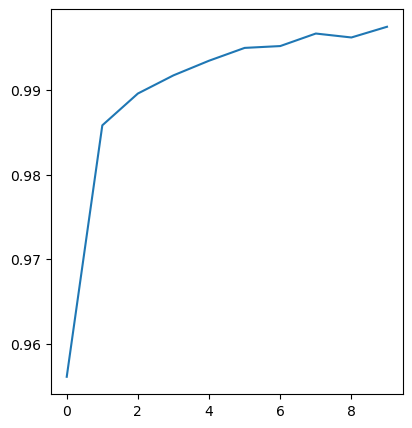

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

train_data = np.expand_dims(x_train, axis=-1)
test_data = np.expand_dims(x_test, axis=-1)

train_data = train_data / 255.0
test_data = test_data / 255.0

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, y_train, epochs=10) #, validation_split=0.2, verbose=1

p_labels = model.predict(test_data)

results = model.evaluate(test_data, y_test)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training',
           'Validation'])
plt.title('Model Accuracy')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training',
           'Validation'])
plt.title('Model Loss')
plt.show()